<a href="https://colab.research.google.com/github/Rahmalyana/2025-Pengolahan-Citra/blob/main/Jobsheet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 1

## P1. Mendefinisikan Istilah bit, byte, kilobyte, megabyte

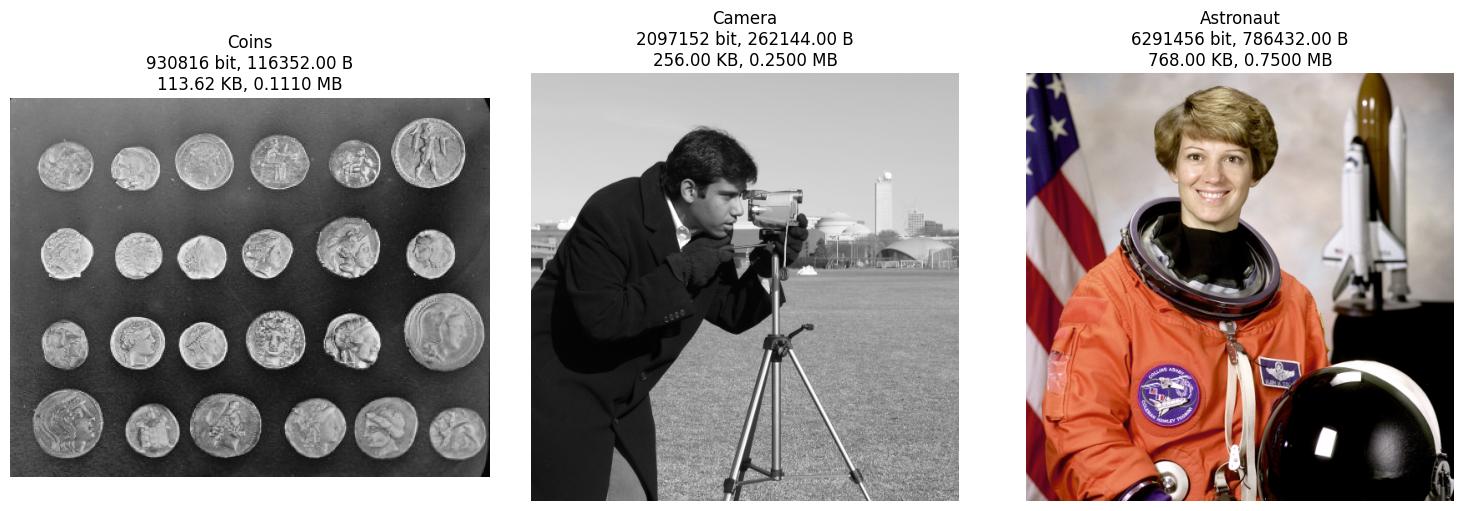

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

#Contoh gamvar dari sckit-image
gambar_coins = data.coins()
gambar_camera = data.camera()
gambar_astronaut = data.astronaut()

# Fungsi untuk menghitung ukuran gambar dalam bit, byte, KB, MB
def hitung_ukuran(image):
  bit_per_pixel = 8 if len (image.shape) == 2 else 24 #Grayscale=8 bit, RGB=24 bit
  total_pixels = image.shape[0] * image.shape[1]
  total_bits = total_pixels * bit_per_pixel
  total_bytes = total_bits / 8
  total_kb = total_bytes / 1024
  total_mb = total_kb / 1024
  return total_bits, total_bytes, total_kb, total_mb

#menyusun gambar dan ukurannya dalam satu baris
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#daftar gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
  bits, bytes_, kb, mb = hitung_ukuran(img)
  ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  ax.set_title(f"{nama}\n{bits} bit, {bytes_:.2f} B\n{kb:.2f} KB, {mb:.4f} MB")
  ax.axis('off')

plt.tight_layout()
plt.show()


## P2. Citra digital tersusun dari beberapa pixel

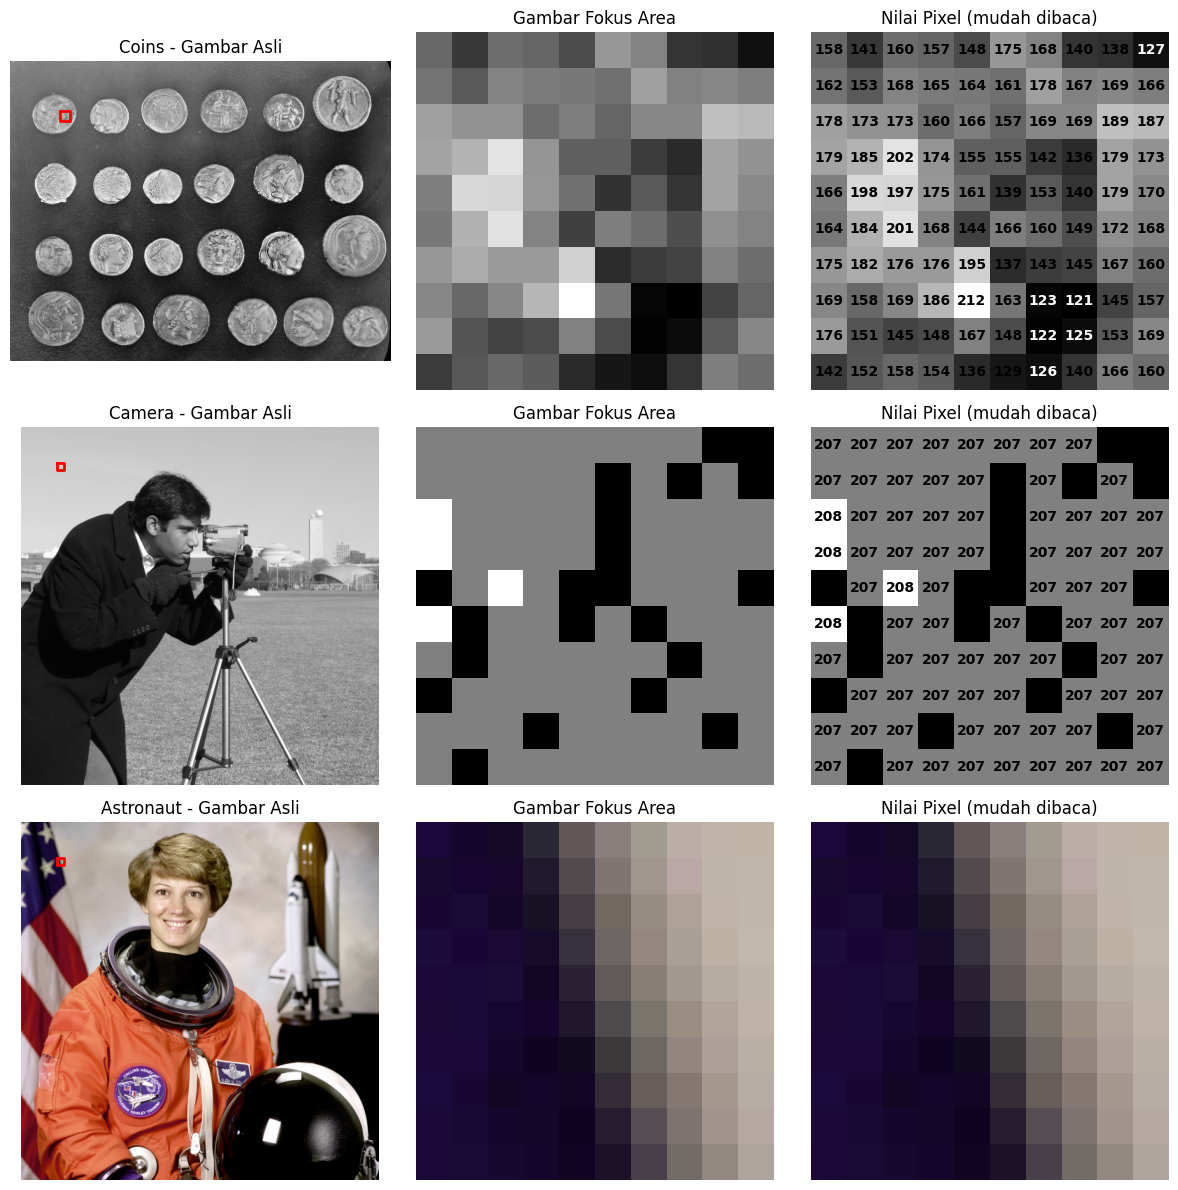

In [9]:
from re import X
# Menampilkan bagaimana citra digital tersusun dari pixel dgn fokus yg ditandai
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# List gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

# Koordinat area kecil yang di Zoom
x_start, x_end = 50, 60
y_start, y_end = 50, 60

for i, (img, nama) in enumerate (zip(gambar_list, nama_list)):
  # Gambar asli
  axes[i, 0].imshow(img, cmap='gray'if len(img.shape) == 2 else None)
  axes[i, 0].set_title(f"{nama} - Gambar Asli")
  axes[i, 0].axis('off')

  # Tambahkan kotak merah untuk menunjuk area yg difokuskan
  rect_x = [x_start, x_end, x_end, x_start, x_start]
  rect_y = [y_start, y_start, y_end, y_end, y_start]
  axes[i, 0].plot(rect_x, rect_y, color="red", linewidth=2)

  # Gambar fokus area
  zoomed_img = img[y_start:y_end, x_start:x_end]
  axes[i, 1].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')
  axes[i, 1].set_title("Gambar Fokus Area")
  axes[i, 1].axis('off')

  # Menampilkan nilai pixel dalm are yg dizoom
  axes[i, 2].imshow(zoomed_img, cmap='gray' if len (img.shape) ==  2 else None, interpolation='nearest')

  for y in range (zoomed_img.shape[0]):
    for x in range (zoomed_img.shape[1]):
      if len(img.shape) == 3: #jika RGB ambil nilai rata pixel utk tampilkan angka
        pixel_value = np.mean(zoomed_img[7, x].astype(int))
      else:
        pixel_value = zoomed_img[y, x]

        # Pilih warna text
        text_color = "white" if pixel_value < 128 else "black"
        axes[i, 2].text(x, y, str(pixel_value), color=text_color, ha='center', va='center', fontsize=10, fontweight='bold')

    axes[i, 2].set_title("Nilai Pixel (mudah dibaca)")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()
